# 2- Machine Learning avec PySpark et MLlib
## Résoudre un problème de classification binaire


# Data
L'ensemble de données provient de l'**UCI Machine Learning repository**, il est lié aux campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. L'objectif de la classification est de prédire si le client souscrira (Oui/Non) à un dépôt à terme.
L'ensemble de données peut être téléchargé à partir de Kaggle: https://www.kaggle.com/rouseguy/bankbalanced/data

### Variables:
1- age (numeric)

2- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)

3- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)

4- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)

5- default: has credit in default? (categorical: “no”, “yes”, “unknown”)

6- balance (numeric)

7- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)

8- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

9- contact: contact communication type (categorical: “cellular”, “telephone”)

10- day: last contact day of the week (categorical: “mon”= 1, “tue”= 2, “wed”=3, ...)

11- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

12- duration: last contact duration, in seconds (numeric). 

**Important note:** this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

13- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15- previous: number of contacts performed before this campaign and for this client (numeric)

16- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

17- deposit: has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

### Input variables:
age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome.

### Output variable: 
deposit

- **pyspark.sql.SparkSession** représente le point d’entrée principal pour les fonctionnalités DataFrame et SQL.
- **"spark = SparkSession.builder.appName('ml-bank').getOrCreate()"** Pour la création d'un DataFrame PySpark à partir d’un datasource (un fichier CSV dans notre cas) 
- **getOrCreat()** créera la SparkSession s'il n'en existe pas déjà ou réutilisera une SparkSession existante.
- **"DataFrame.printSchema()"** fournit une vue facilement lisible du schéma DataFrame.

**Remarque:** La colonne peut contenir des valeurs manquantes si la propriété **nullable** est définie sur true.


In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



L'ensemble de données fournit les informations des clients de la banque. Il comprend **11 162** enregistrements et **17** champs.

- Pour afficher la 1ere ligne du DataFrame:

In [2]:
df.head()

Row(age=59, job='admin.', marital='married', education='secondary', default='no', balance=2343, housing='yes', loan='no', contact='unknown', day=5, month='may', duration=1042, campaign=1, pdays=-1, previous=0, poutcome='unknown', deposit='yes')

- Pour afficher la liste des différentes colonnes du DataFrame:

In [3]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


 **".show()"** est utilisée pour afficher le contenu du DataFrame dans un format de tableau de lignes et de colonnes. Par défaut, il n’affiche que 20 lignes.

In [4]:
df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

# Data Exploration

Pandas dataframe est plus jolie que Spark DataFrame.show()

In [5]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


Les deux classes sont parfaitement équilibrés:

In [6]:
df.groupby('deposit').count().toPandas()

,deposit,count
0,no,5873
1,yes,5289


### Summary statistics for numeric variables
Cette commande affiche: **Count**, **mean** (la moyenne), **sddev** (l'écart-type), **min** et **max** des variables numériques:

In [7]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


### Visualisations 

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [9]:
data  = pd.read_csv('bank.csv', header=0)

In [10]:
print(data.shape)

(11162, 17)


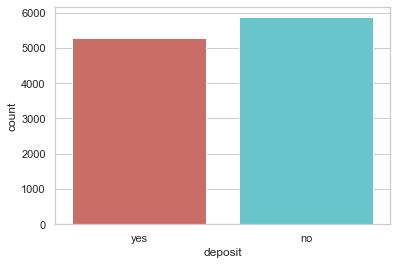

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x='deposit', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

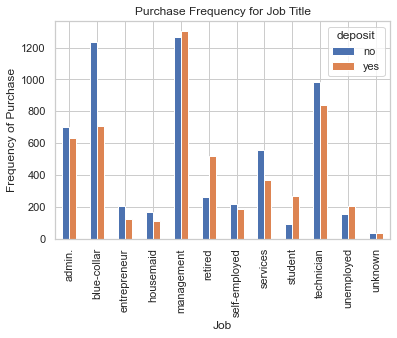

In [12]:
%matplotlib inline
pd.crosstab(data.job,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

La fréquence d'achat dépend beaucoup de l'intitulé du poste. Ainsi, le titre du poste peut être un bon prédicteur de la variable de résultat.

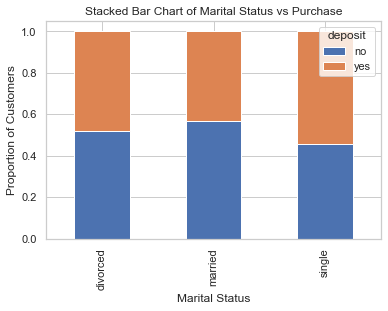

In [13]:
table=pd.crosstab(data.marital,data.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Le statut social ne semble pas un prédicteur fort pour la variable de résultat.

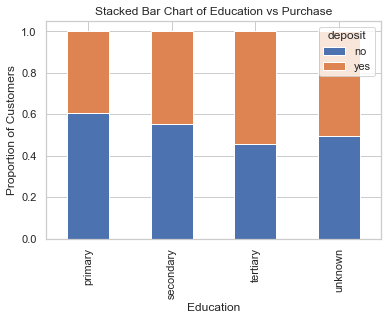

In [14]:
table=pd.crosstab(data.education,data.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

L'éducation semble être un bon prédicteur de la variable de résultat.

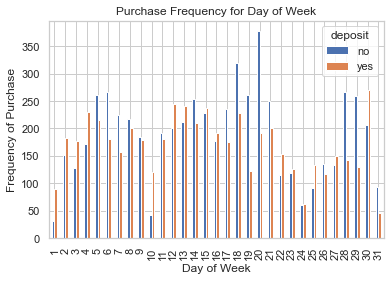

In [15]:
pd.crosstab(data.day,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Le jour de la semaine peut ne pas être un bon prédicteur du résultat.

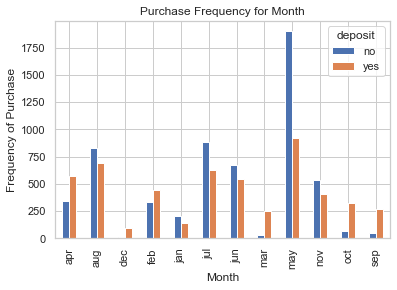

In [16]:
pd.crosstab(data.month,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Le mois peut être un bon prédicteur de la variable de résultat.

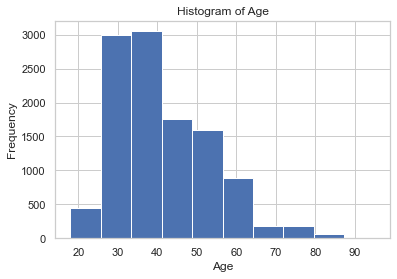

In [17]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

La plupart des clients de la banque dans cet ensemble de données ont entre 30 et 40 ans.

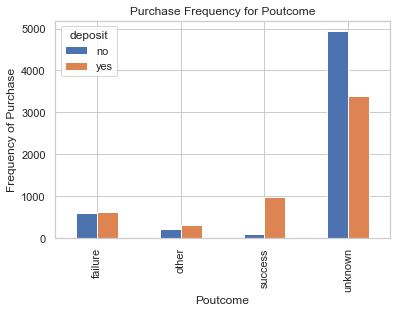

In [18]:
pd.crosstab(data.poutcome,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome semble être un bon prédicteur de la variable de résultat.

### Corrélations entre les variables indépendantes

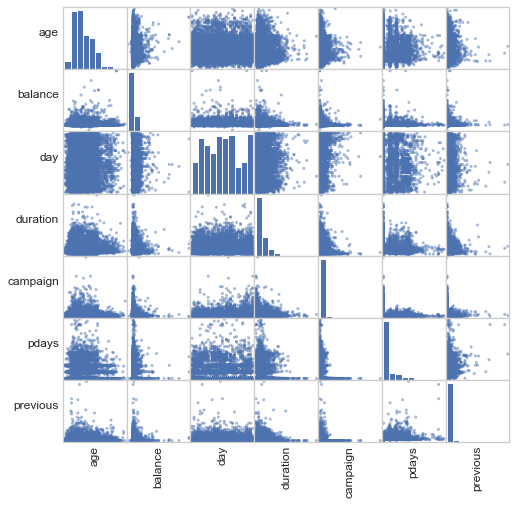

In [19]:
numeric_data = df.select(numeric_features).toPandas()

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Il est évident qu'il n'y a pas de variables numériques fortement corrélées. Par conséquent, nous les conserverons tous pour le modèle. Cependant, les colonnes day et month ne sont pas vraiment utiles, nous allons supprimer ces deux colonnes.

In [20]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



# Preparing Data for Machine Learning

Le processus comprend le **Category Indexing**, **One-Hot Encoding** et **VectorAssembler**, un transformateur de fonctionnalités qui fusionne plusieurs colonnes en une colonne vectorielle.

In [21]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

Le code ci-dessus est extrait du site officiel de **Databricks**: https://docs.databricks.com/applications/machine-learning/train-model/mllib/index.html#binary-classification-example

# Pipeline

Nous utilisons Pipeline pour chaîner plusieurs transformateurs et estimateurs afin de spécifier notre flux de travail d'apprentissage automatique. Les étapes d'un Pipeline sont spécifiées sous la forme d'un tableau ordonné.

In [22]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [23]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1.0,1.0,1.0,1.0,1.0
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


 Nous avons maintenant une colonne de caractéristiques (**features**) et une colonne d'étiquette (**Label**).

Nous avona divisé le jeu de données en 2 parties: Une partie pour **l'entrainement** (70%) et une partie pour **le test** (30%):

In [24]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7855
Test Dataset Count: 3307


# Modèle de régression logistique

In [25]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

Nous pouvons obtenir les coefficients en utilisant les attributs de LogisticRegressionModel.

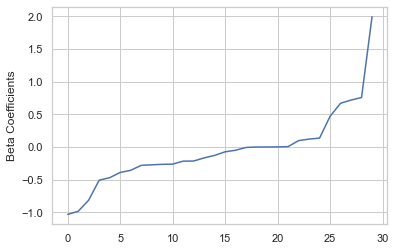

In [26]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

Nous pouvons également obtenir le **receiver-operating characteristic** et **areaUnderROC**.

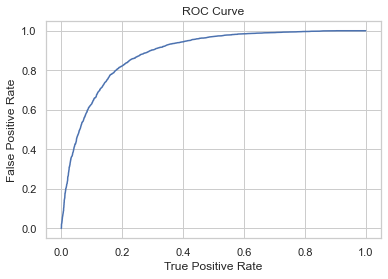

Training set areaUnderROC: 0.8865551189326405


In [27]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### Precision and recall

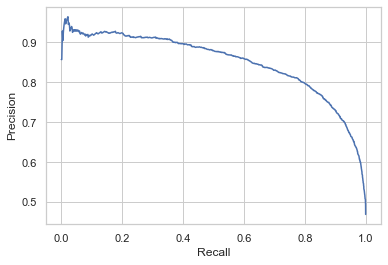

In [28]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### Faire des prédictions sur l'ensemble de test 

In [29]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[1.93500470498079...|       0.0|[0.87380233100701...|
| 49|management|  0.0|[2.04809361205496...|       0.0|[0.88575484704982...|
| 52|management|  0.0|[-0.7002122133357...|       1.0|[0.33176517908283...|
| 53|management|  0.0|[1.03431610227357...|       0.0|[0.73775180622517...|
| 58|management|  0.0|[2.74273671692568...|       0.0|[0.93950183380104...|
| 32|management|  0.0|[1.25033004378244...|       0.0|[0.77735698810451...|
| 57|management|  0.0|[1.19540519867323...|       0.0|[0.76770638557283...|
| 52|management|  0.0|[3.26456982709641...|       0.0|[0.96319314409492...|
| 46|management|  0.0|[2.15036209979036...|       0.0|[0.89570260888977...|
| 31|management|  0.0|[1.47751802200862...|       0.0|[0.81419739986183...|
+---+-------

### Évaluez notre modèle de régression logistique

In [30]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8837112925002687


# Decision Tree Classifier

Les arbres de décision sont largement utilisés car ils sont faciles à interpréter, gèrent les caractéristiques catégorielles, s'étendent à la classification multiclasse, ne nécessitent pas de mise à l'échelle des caractéristiques et sont capables de capturer les non-linéarités et les interactions de caractéristiques.

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 33|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 49|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|management|  0.0|[520.0,1931.0]|       1.0|[0.21215830273357...|
| 53|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 58|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 32|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 57|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 46|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 31|management|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

### Évaluez notre modèle d'arbre de décision

In [32]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7808118726917547


Un arbre de décision simple a mal fonctionné car il est trop faible. La précision de prédiction des arbres de décision peut être améliorée par differents méthodes telles que **Random Forest** et **Gradient-Boosted Tree**.

# Random Forest Classifier

In [33]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[13.3319994510978...|       0.0|[0.66659997255489...|
| 49|management|  0.0|[12.8274882120090...|       0.0|[0.64137441060045...|
| 52|management|  0.0|[7.51139490276589...|       1.0|[0.37556974513829...|
| 53|management|  0.0|[11.7913876191042...|       0.0|[0.58956938095521...|
| 58|management|  0.0|[14.2737109939265...|       0.0|[0.71368554969632...|
| 32|management|  0.0|[13.8512305758578...|       0.0|[0.69256152879289...|
| 57|management|  0.0|[13.7311667026663...|       0.0|[0.68655833513331...|
| 52|management|  0.0|[16.5516422079630...|       0.0|[0.82758211039815...|
| 46|management|  0.0|[16.6564667517940...|       0.0|[0.83282333758970...|
| 31|management|  0.0|[13.2196082553671...|       0.0|[0.66098041276835...|
+---+-------

### Évaluez le classificateur du Random Forest

In [34]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8770900512243783


# Gradient-Boosted Tree Classifier

In [35]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[0.94992370947246...|       0.0|[0.86987425549896...|
| 49|management|  0.0|[1.28281748604659...|       0.0|[0.92861688965145...|
| 52|management|  0.0|[-0.5021429054421...|       1.0|[0.26809961471379...|
| 53|management|  0.0|[0.09646513340517...|       0.0|[0.54808351175538...|
| 58|management|  0.0|[1.05831377292163...|       0.0|[0.89250881497055...|
| 32|management|  0.0|[0.57268875896254...|       0.0|[0.75866558918304...|
| 57|management|  0.0|[0.34932946844840...|       0.0|[0.66789037418062...|
| 52|management|  0.0|[1.33264456943866...|       0.0|[0.93494709840561...|
| 46|management|  0.0|[1.28262818068783...|       0.0|[0.92859178839697...|
| 31|management|  0.0|[1.16094954405484...|       0.0|[0.91067454521219...|
+---+-------

### Évaluez le classificateur du Gradient-Boosted Tree

In [36]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8935091626908479


Gradient-Boosted Tree a obtenu les meilleurs résultats, nous allons essayer de régler ce modèle avec **ParamGridBuilder** et **CrossValidator**. 

Avant cela, nous pouvons utiliser **ExplainParams()** pour afficher une liste de tous les paramètres et leurs définitions afin de comprendre quels paramètres sont disponibles pour le réglage.

In [37]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

# ParamGridBuilder et CrossValidator.

In [38]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8954659543871663

Pour résumer, nous avons créer une application de classification binaire à l'aide de **PySpark** et de l'**API Pipelines MLlib**. Nous avons essayé **quatre algorithmes** de **Machine Learning** et l'amplification du gradient a donné les meilleurs résultats sur notre jeu de données.